In [1]:

import pandas as pd
import re #regex library to format fast to read into pd 
import os

import matplotlib.pyplot as plt
import feather

import numpy as np
import platform
import mne
from scipy.stats import ttest_ind

from scipy import stats

from mne.channels import find_ch_adjacency, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test
from mne.stats import (ttest_1samp_no_p, bonferroni_correction, fdr_correction,


                       permutation_t_test, permutation_cluster_1samp_test,spatio_temporal_cluster_1samp_test)
import sys
if platform.system()=='Darwin':
    os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')
    #if this doesn't work pound line right above this, restart the kernel, rerun the cell. 
    #Then uncomment the same line and rerun

else:
    #os.chdir('Z:/BBC/WP1/data/EEG/tsk')
    sys.path.append('C:/Users/Vivi/switchdrive/BBC/WP1/data/Code/python/BBC')
    os.chdir('Z:/BBC/WP1/data/EEG/tsk')

from base.files_in_out import getListOfFiles,GetFiles
from stats.stats_helper import filter_list, tTest_ana
import stats.t_tests_cluster as clus
import stats.stats_helper as s_hp
import base.base_constants as cs

C:\Users\Vivi\anaconda3\envs\mne\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\Vivi\anaconda3\envs\mne\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['text.usetex']=False
plt.style.use('default')

mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['text.usetex']=False

In [3]:
#define variables 
modtype="modfit"
erp_type="hep"
cond="awareness_unaware"
dc_type="dc"

#load corresponding file 

file_dir=f'ana/deconvolution/stats/BF_matrix_{modtype}_{erp_type}_{cond}_{dc_type}.ep'
f = open(file_dir)


In [4]:
data=np.loadtxt(file_dir)
data.shape

(128, 282)

In [6]:
clus.plot_from_BF(data)

AttributeError: module 'stats.t_tests_cluster' has no attribute 'plot_from_BF'

In [3]:
subject_list=cs.G_N

X=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit/dc/{g_num}_modfit_hep_awareness_unaware_dc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data.T
print(X.shape)
    


NameError: name 'cs' is not defined

In [115]:
%matplotlib qt
s_hp.get_tTest(X,crop_value=[-0.3,0.8],FDR=False,p_val=0.05)

-0.3


(array([[-0.49230411, -0.26370281,  0.08891813, ..., -0.04920821,
         -0.14025756, -0.11714548],
        [-0.81982893, -0.65575975, -0.28960823, ...,  0.70497623,
          0.60119098,  0.63207546],
        [ 0.11160343,  0.26703353,  0.54383726, ...,  0.41885703,
          0.37518456,  0.35464898],
        ...,
        [ 1.07792463,  0.7340492 ,  0.43734212, ..., -0.37051591,
         -0.30837421, -0.09270906],
        [ 0.20728753, -0.06935133, -0.51622989, ...,  0.33360833,
          0.2591037 ,  0.24593505],
        [ 0.11654593, -0.02307575, -0.42485975, ...,  0.8367085 ,
          0.4109708 ,  0.24474047]]),
 array([[0.62634248, 0.79394003, 0.92977994, ..., 0.96110271, 0.88946061,
         0.90758103],
        [0.41923801, 0.51733126, 0.77424973, ..., 0.48664843, 0.55254925,
         0.53246514],
        [0.91193406, 0.79140032, 0.59085792, ..., 0.67851636, 0.71035032,
         0.72550984],
        ...,
        [0.29026669, 0.46902147, 0.66521805, ..., 0.71378642, 0.76008021

In [103]:
cs.G_N

['g01',
 'g03',
 'g08',
 'g10',
 'g11',
 'g12',
 'g15',
 'g16',
 'g17',
 'g19',
 'g23',
 'g24',
 'g25',
 'g28',
 'g32',
 'g33',
 'g34',
 'g37',
 'g38',
 'g39',
 'g40',
 'g41',
 'g42',
 'g44',
 'g45',
 'g46',
 'g47',
 'g49',
 'g51',
 'g52']

In [8]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit/dc/{g_num}_modfit_hep_awareness_unaware_dc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data
print(X.shape)



(30, 282, 128)


In [117]:

permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_TFCE(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)



stat_fun(H1): min=-4.079527 max=4.395751
Running initial clustering
Using 9 thresholds from 0.00 to 4.00 for TFCE computation (h_power=2.00, e_power=0.50)
Found 36096 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


(array([[ -0.        , -24.34517406,   0.        , ...,  37.90534704,
           0.        ,   0.        ],
        [ -0.        , -24.34517406,   0.        , ...,  26.52828679,
          -0.        ,  -0.        ],
        [  0.        ,  -0.        ,  26.52828679, ...,   0.        ,
         -24.34517406,  -0.        ],
        ...,
        [ -0.        ,  26.52828679,   0.        , ...,  -0.        ,
           0.        ,  26.52828679],
        [ -0.        ,  26.52828679,   0.        , ...,  -0.        ,
           0.        ,   0.        ],
        [ -0.        ,  26.52828679,   0.        , ...,  -0.        ,
           0.        ,   0.        ]]),
 [array([[ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..

stat_fun(H1): min=-4.286216 max=4.056280
Running initial clustering
Found 34 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


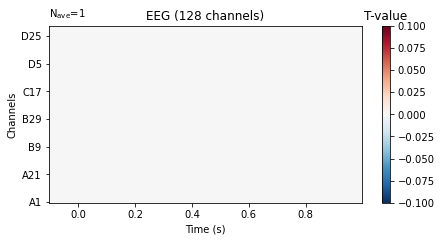

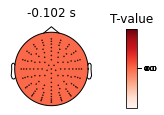

(array([[-1.01006591, -1.29406257, -0.58230881, ...,  1.49717027,
          0.94521191,  0.90480806],
        [-0.84020428, -1.17351822, -0.47814707, ...,  1.19991958,
          0.76543462,  0.81359652],
        [-0.59735807, -0.91847556, -0.28112822, ...,  0.9295133 ,
          0.48774962,  0.5781696 ],
        ...,
        [ 0.63717233,  1.17221179,  1.0042553 , ..., -0.60181479,
         -0.37471155, -0.27340421],
        [ 0.5377571 ,  1.07485418,  0.96096033, ..., -0.64679142,
         -0.48211339, -0.54852491],
        [ 0.54368327,  1.0933096 ,  0.94075845, ..., -0.54199563,
         -0.55034283, -0.6474515 ]]),
 [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([

In [9]:
permutations = 1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_cluster(X, plot_times='peaks', adjacency=adjacency, averages=None, permutations=permutations,p_val=0.01)fdfe


In [79]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit/nodc/{g_num}_modfit_hep_awareness_unaware_nodc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data.T
print(X.shape)



(30, 128, 282)


In [80]:
%matplotlib qt
s_hp.get_tTest(X,crop_value=[-0.3,0.8],FDR=False)

-0.3


(array([[-1.03883378, -0.85860329, -0.61286169, ...,  0.6032752 ,
          0.55481322,  0.60047314],
        [-1.38072766, -1.25129545, -0.99926385, ...,  0.13024075,
          0.08138047,  0.10618501],
        [-0.66555245, -0.54700667, -0.348515  , ..., -0.60712425,
         -0.65221255, -0.66782911],
        ...,
        [ 1.50881564,  1.2156752 ,  0.95425022, ..., -1.92822817,
         -1.86955745, -1.74197125],
        [ 0.9516091 ,  0.77348575,  0.50024149, ..., -0.5740876 ,
         -0.66903442, -0.74019964],
        [ 0.91484667,  0.82560918,  0.59586324, ..., -0.34522625,
         -0.54055427, -0.63546511]]),
 array([[0.30746643, 0.39760083, 0.54474443, ..., 0.55101523, 0.5832767 ,
         0.55285517],
        [0.17791218, 0.22082709, 0.32593232, ..., 0.89727519, 0.93569845,
         0.9161667 ],
        [0.51095657, 0.58855911, 0.72997097, ..., 0.54849297, 0.51940062,
         0.50952304],
        ...,
        [0.14216472, 0.23391265, 0.34784408, ..., 0.06366912, 0.07167321

In [8]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit/nodc/{g_num}_modfit_hep_awareness_unaware_nodc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data
print(X.shape)



(30, 282, 128)


stat_fun(H1): min=-3.899267 max=4.618463
Running initial clustering
Using 10 thresholds from 0.00 to 4.50 for TFCE computation (h_power=2.00, e_power=0.50)
Found 36096 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


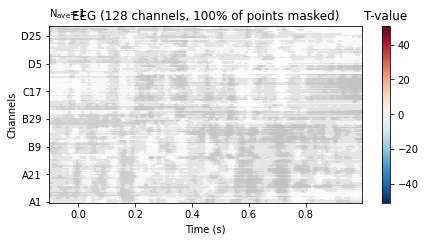

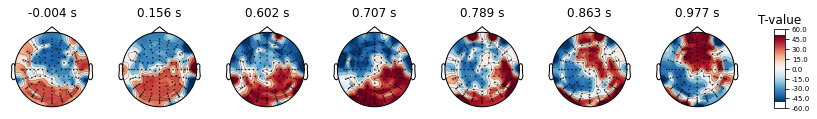

(array([[-33.36500356, -33.36500356, -25.21408337, ...,  31.36614086,
          26.22856268,  26.22856268],
        [-25.21408337, -33.36500356, -25.21408337, ...,  30.53698466,
          26.22856268,  26.22856268],
        [-25.21408337, -25.21408337,  -0.        , ...,  26.22856268,
          26.22856268,  26.22856268],
        ...,
        [ 26.22856268,   0.        , -25.21408337, ..., -40.22040034,
         -25.21408337,  -0.        ],
        [ 26.22856268,   0.        , -25.21408337, ..., -40.22040034,
         -25.21408337, -25.21408337],
        [ 26.22856268,   0.        , -25.21408337, ..., -40.22040034,
         -25.21408337, -25.21408337]]),
 [array([[ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..

In [9]:

permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_TFCE(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)



stat_fun(H1): min=-3.899267 max=4.618463
Running initial clustering
Found 115 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


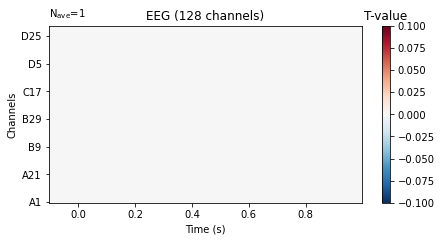

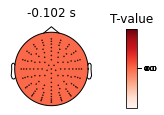

(array([[-1.03883378, -1.38072766, -0.66555245, ...,  1.50881564,
          0.9516091 ,  0.91484667],
        [-0.85860329, -1.25129545, -0.54700667, ...,  1.2156752 ,
          0.77348575,  0.82560918],
        [-0.61286169, -0.99926385, -0.348515  , ...,  0.95425022,
          0.50024149,  0.59586324],
        ...,
        [ 0.6032752 ,  0.13024075, -0.60712425, ..., -1.92822817,
         -0.5740876 , -0.34522625],
        [ 0.55481322,  0.08138047, -0.65221255, ..., -1.86955745,
         -0.66903442, -0.54055427],
        [ 0.60047314,  0.10618501, -0.66782911, ..., -1.74197125,
         -0.74019964, -0.63546511]]),
 [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([

In [10]:
permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_cluster(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)


## Cardiac effects

In [81]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit_card/dc/{g_num}_modfit_card_hep_awareness_unaware_dc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data.T
print(X.shape)



(30, 128, 282)


In [82]:
%matplotlib qt
s_hp.get_tTest(X,crop_value=[-0.3,0.8],FDR=False)

-0.3


(array([[-0.8952527 , -0.74177091, -0.49898289, ...,  0.61934677,
          0.52454953,  0.52860563],
        [-1.15461477, -1.04605871, -0.78748317, ...,  1.12847041,
          1.03592381,  1.04759764],
        [-0.44187862, -0.34771788, -0.15546722, ...,  0.98623112,
          0.95383473,  0.930365  ],
        ...,
        [ 1.50638251,  1.21343296,  0.92865541, ..., -0.56756174,
         -0.61242972, -0.51465696],
        [ 0.93146274,  0.75553742,  0.46148956, ..., -0.32907143,
         -0.44362413, -0.52013673],
        [ 0.87338332,  0.78954648,  0.54301014, ..., -0.25687724,
         -0.54194282, -0.64406963]]),
 array([[0.37802296, 0.4641916 , 0.62155564, ..., 0.54052361, 0.60388334,
         0.60110162],
        [0.25767426, 0.30417501, 0.43738832, ..., 0.2683707 , 0.3087991 ,
         0.30347712],
        [0.66185474, 0.73056329, 0.8775301 , ..., 0.33217717, 0.34805083,
         0.35986271],
        ...,
        [0.14278533, 0.23475533, 0.36073336, ..., 0.57470057, 0.5450262 

In [30]:
dfgsubject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit_card/dc/{g_num}_modfit_card_hep_awareness_unaware_dc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data
print(X.shape)



(30, 282, 128)


In [31]:

permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_TFCE(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)



stat_fun(H1): min=-4.369392 max=4.196515
Running initial clustering
Using 9 thresholds from 0.00 to 4.00 for TFCE computation (h_power=2.00, e_power=0.50)
Found 36096 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


(array([[-25.0499501 , -30.95545601,  -0.        , ...,  32.75887398,
          27.22246315,  27.22246315],
        [-25.0499501 , -30.95545601,  -0.        , ...,  31.89284857,
          27.22246315,  27.22246315],
        [ -0.        , -25.0499501 ,  -0.        , ...,  27.22246315,
           0.        ,  27.22246315],
        ...,
        [ 27.22246315,  39.07309605,  27.22246315, ..., -25.0499501 ,
          -0.        ,  -0.        ],
        [ 27.22246315,  39.07309605,  27.22246315, ..., -25.0499501 ,
          -0.        , -25.0499501 ],
        [ 27.22246315,  39.07309605,  27.22246315, ..., -25.0499501 ,
         -25.0499501 , -25.0499501 ]]),
 [array([[ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..

In [32]:
permutations = 1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_cluster(X, plot_times='peaks', adjacency=adjacency, averages=None, permutations=permutations)


stat_fun(H1): min=-4.369392 max=4.196515
Running initial clustering
Found 144 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


(array([[-0.8952527 , -1.15461477, -0.44187862, ...,  1.50638251,
          0.93146274,  0.87338332],
        [-0.74177091, -1.04605871, -0.34771788, ...,  1.21343296,
          0.75553742,  0.78954648],
        [-0.49898289, -0.78748317, -0.15546722, ...,  0.92865541,
          0.46148956,  0.54301014],
        ...,
        [ 0.61934677,  1.12847041,  0.98623112, ..., -0.56756174,
         -0.32907143, -0.25687724],
        [ 0.52454953,  1.03592381,  0.95383473, ..., -0.61242972,
         -0.44362413, -0.54194282],
        [ 0.52860563,  1.04759764,  0.930365  , ..., -0.51465696,
         -0.52013673, -0.64406963]]),
 [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([

In [83]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit_card/nodc/{g_num}_modfit_card_hep_awareness_unaware_nodc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data.T
print(X.shape)



(30, 128, 282)


In [84]:
%matplotlib qt
s_hp.get_tTest(X,crop_value=[-0.3,0.8],FDR=False)

-0.3


(array([[-0.94253609, -0.77324187, -0.52939608, ...,  0.4192722 ,
          0.36981939,  0.40777015],
        [-1.26145123, -1.14013546, -0.88405002, ..., -0.05351964,
         -0.09803675, -0.07654639],
        [-0.53604374, -0.42817252, -0.23412205, ..., -0.74860924,
         -0.78898781, -0.80466962],
        ...,
        [ 1.53195435,  1.23450079,  0.96327941, ..., -1.91208201,
         -1.8598624 , -1.73784747],
        [ 0.94706606,  0.76795409,  0.48438907, ..., -0.50843801,
         -0.61158653, -0.69244161],
        [ 0.89101621,  0.80443652,  0.5657496 , ..., -0.26087252,
         -0.46878997, -0.5706212 ]]),
 array([[0.3537045 , 0.44563666, 0.60056023, ..., 0.67810677, 0.71420413,
         0.68643725],
        [0.21719929, 0.26355913, 0.38394004, ..., 0.95768487, 0.92257759,
         0.93951007],
        [0.59601636, 0.67168884, 0.81653523, ..., 0.4601217 , 0.43652229,
         0.42755829],
        ...,
        [0.13637115, 0.22692643, 0.34337149, ..., 0.06579052, 0.07307619

In [33]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit_card/nodc/{g_num}_modfit_card_hep_awareness_unaware_nodc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data
print(X.shape)



(30, 282, 128)


In [34]:

permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_TFCE(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)



stat_fun(H1): min=-4.148319 max=4.685219
Running initial clustering
Using 10 thresholds from 0.00 to 4.50 for TFCE computation (h_power=2.00, e_power=0.50)
Found 36096 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


(array([[-24.93115521, -32.65287781, -24.93115521, ...,  32.16282499,
          26.43624406,  26.43624406],
        [-24.93115521, -32.65287781,  -0.        , ...,  31.29679958,
          26.43624406,  26.43624406],
        [-24.93115521, -24.93115521,  -0.        , ...,  26.43624406,
           0.        ,  26.43624406],
        ...,
        [  0.        ,  -0.        , -24.93115521, ..., -41.09131638,
         -24.93115521,  -0.        ],
        [  0.        ,  -0.        , -24.93115521, ..., -41.09131638,
         -24.93115521,  -0.        ],
        [  0.        ,  -0.        , -24.93115521, ..., -41.09131638,
         -24.93115521, -24.93115521]]),
 [array([[ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..

In [35]:
permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_cluster(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)


stat_fun(H1): min=-4.148319 max=4.685219
Running initial clustering
Found 121 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


(array([[-0.94253609, -1.26145123, -0.53604374, ...,  1.53195435,
          0.94706606,  0.89101621],
        [-0.77324187, -1.14013546, -0.42817252, ...,  1.23450079,
          0.76795409,  0.80443652],
        [-0.52939608, -0.88405002, -0.23412205, ...,  0.96327941,
          0.48438907,  0.5657496 ],
        ...,
        [ 0.4192722 , -0.05351964, -0.74860924, ..., -1.91208201,
         -0.50843801, -0.26087252],
        [ 0.36981939, -0.09803675, -0.78898781, ..., -1.8598624 ,
         -0.61158653, -0.46878997],
        [ 0.40777015, -0.07654639, -0.80466962, ..., -1.73784747,
         -0.69244161, -0.5706212 ]]),
 [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([

In [8]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit_card/dc/{g_num}_modfit_card_hep_card_phase_sys_dc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data.T
print(X.shape)



(30, 128, 282)


In [10]:
%matplotlib qt
s_hp.get_tTest(X,crop_value=[-0.3,0.8],FDR=True)

-0.3


(array([[ 0.20005438,  0.39060026,  0.51926754, ..., -0.53291962,
         -0.56195676, -0.60324639],
        [-0.90411268, -0.6909911 , -0.55839192, ...,  0.83389199,
          0.96886268,  1.04391464],
        [-1.39523353, -1.26122607, -1.20095504, ...,  1.63925279,
          1.7239388 ,  1.86153188],
        ...,
        [-1.38541881, -1.86325725, -2.33165819, ...,  1.05830035,
          1.09665667,  1.23504191],
        [-0.72779079, -1.14468473, -1.53875907, ...,  1.18391608,
          1.07551697,  1.11545568],
        [-0.49646672, -0.7551908 , -1.03073515, ...,  0.69098138,
          0.62579944,  0.67726309]]),
 array([[0.84283433, 0.6989474 , 0.60751489, ..., 0.59814973, 0.57846339,
         0.55103413],
        [0.37338535, 0.49506553, 0.58086292, ..., 0.41115818, 0.34062525,
         0.30514919],
        [0.17353942, 0.21727923, 0.23948614, ..., 0.11196573, 0.09536559,
         0.07283293],
        ...,
        [0.17648869, 0.07258225, 0.02687234, ..., 0.29865453, 0.2818149 

In [30]:
dfgsubject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit_card/dc/{g_num}_modfit_card_hep_awareness_unaware_dc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data
print(X.shape)



(30, 282, 128)


In [31]:

permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_TFCE(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)



stat_fun(H1): min=-4.369392 max=4.196515
Running initial clustering
Using 9 thresholds from 0.00 to 4.00 for TFCE computation (h_power=2.00, e_power=0.50)
Found 36096 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


(array([[-25.0499501 , -30.95545601,  -0.        , ...,  32.75887398,
          27.22246315,  27.22246315],
        [-25.0499501 , -30.95545601,  -0.        , ...,  31.89284857,
          27.22246315,  27.22246315],
        [ -0.        , -25.0499501 ,  -0.        , ...,  27.22246315,
           0.        ,  27.22246315],
        ...,
        [ 27.22246315,  39.07309605,  27.22246315, ..., -25.0499501 ,
          -0.        ,  -0.        ],
        [ 27.22246315,  39.07309605,  27.22246315, ..., -25.0499501 ,
          -0.        , -25.0499501 ],
        [ 27.22246315,  39.07309605,  27.22246315, ..., -25.0499501 ,
         -25.0499501 , -25.0499501 ]]),
 [array([[ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..

In [32]:
permutations = 1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_cluster(X, plot_times='peaks', adjacency=adjacency, averages=None, permutations=permutations)


stat_fun(H1): min=-4.369392 max=4.196515
Running initial clustering
Found 144 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


(array([[-0.8952527 , -1.15461477, -0.44187862, ...,  1.50638251,
          0.93146274,  0.87338332],
        [-0.74177091, -1.04605871, -0.34771788, ...,  1.21343296,
          0.75553742,  0.78954648],
        [-0.49898289, -0.78748317, -0.15546722, ...,  0.92865541,
          0.46148956,  0.54301014],
        ...,
        [ 0.61934677,  1.12847041,  0.98623112, ..., -0.56756174,
         -0.32907143, -0.25687724],
        [ 0.52454953,  1.03592381,  0.95383473, ..., -0.61242972,
         -0.44362413, -0.54194282],
        [ 0.52860563,  1.04759764,  0.930365  , ..., -0.51465696,
         -0.52013673, -0.64406963]]),
 [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([

In [83]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit_card/nodc/{g_num}_modfit_card_hep_awareness_unaware_nodc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data.T
print(X.shape)



(30, 128, 282)


In [84]:
%matplotlib qt
s_hp.get_tTest(X,crop_value=[-0.3,0.8],FDR=False)

-0.3


(array([[-0.94253609, -0.77324187, -0.52939608, ...,  0.4192722 ,
          0.36981939,  0.40777015],
        [-1.26145123, -1.14013546, -0.88405002, ..., -0.05351964,
         -0.09803675, -0.07654639],
        [-0.53604374, -0.42817252, -0.23412205, ..., -0.74860924,
         -0.78898781, -0.80466962],
        ...,
        [ 1.53195435,  1.23450079,  0.96327941, ..., -1.91208201,
         -1.8598624 , -1.73784747],
        [ 0.94706606,  0.76795409,  0.48438907, ..., -0.50843801,
         -0.61158653, -0.69244161],
        [ 0.89101621,  0.80443652,  0.5657496 , ..., -0.26087252,
         -0.46878997, -0.5706212 ]]),
 array([[0.3537045 , 0.44563666, 0.60056023, ..., 0.67810677, 0.71420413,
         0.68643725],
        [0.21719929, 0.26355913, 0.38394004, ..., 0.95768487, 0.92257759,
         0.93951007],
        [0.59601636, 0.67168884, 0.81653523, ..., 0.4601217 , 0.43652229,
         0.42755829],
        ...,
        [0.13637115, 0.22692643, 0.34337149, ..., 0.06579052, 0.07307619

In [33]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit_card/nodc/{g_num}_modfit_card_hep_awareness_unaware_nodc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data
print(X.shape)



(30, 282, 128)


In [34]:

permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_TFCE(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)



stat_fun(H1): min=-4.148319 max=4.685219
Running initial clustering
Using 10 thresholds from 0.00 to 4.50 for TFCE computation (h_power=2.00, e_power=0.50)
Found 36096 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


(array([[-24.93115521, -32.65287781, -24.93115521, ...,  32.16282499,
          26.43624406,  26.43624406],
        [-24.93115521, -32.65287781,  -0.        , ...,  31.29679958,
          26.43624406,  26.43624406],
        [-24.93115521, -24.93115521,  -0.        , ...,  26.43624406,
           0.        ,  26.43624406],
        ...,
        [  0.        ,  -0.        , -24.93115521, ..., -41.09131638,
         -24.93115521,  -0.        ],
        [  0.        ,  -0.        , -24.93115521, ..., -41.09131638,
         -24.93115521,  -0.        ],
        [  0.        ,  -0.        , -24.93115521, ..., -41.09131638,
         -24.93115521, -24.93115521]]),
 [array([[ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..

In [35]:
permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_cluster(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)


stat_fun(H1): min=-4.148319 max=4.685219
Running initial clustering
Found 121 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


(array([[-0.94253609, -1.26145123, -0.53604374, ...,  1.53195435,
          0.94706606,  0.89101621],
        [-0.77324187, -1.14013546, -0.42817252, ...,  1.23450079,
          0.76795409,  0.80443652],
        [-0.52939608, -0.88405002, -0.23412205, ...,  0.96327941,
          0.48438907,  0.5657496 ],
        ...,
        [ 0.4192722 , -0.05351964, -0.74860924, ..., -1.91208201,
         -0.50843801, -0.26087252],
        [ 0.36981939, -0.09803675, -0.78898781, ..., -1.8598624 ,
         -0.61158653, -0.46878997],
        [ 0.40777015, -0.07654639, -0.80466962, ..., -1.73784747,
         -0.69244161, -0.5706212 ]]),
 [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([

## aware vs unaware in aware fit

In [85]:
subject_list=cs.G_N
X_awa=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/awafit/dc/{g_num}_aware_hep__Intercept__dc.ep'
    data=np.loadtxt(file_dir)

    X_awa[idx,:,:]=data.T




In [86]:
subject_list=cs.G_N
X_unawa=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/awafit/dc/{g_num}_unaware_hep__Intercept__dc.ep'
    data=np.loadtxt(file_dir)

    X_unawa[idx,:,:]=data.T




In [87]:
X=X_awa-X_unawa

In [89]:
%matplotlib qt
s_hp.get_tTest(X,crop_value=[-0.3,0.8],FDR=False)

-0.3


(array([[ 0.96506708,  0.79613594,  0.55429254, ..., -0.63610203,
         -0.53686782, -0.54305421],
        [ 1.2297209 ,  1.11020715,  0.85564199, ..., -1.17054434,
         -1.07392697, -1.09336066],
        [ 0.50354357,  0.40138019,  0.20739282, ..., -1.00522709,
         -0.9628418 , -0.94376942],
        ...,
        [-1.51939608, -1.22322072, -0.95497774, ...,  0.59959113,
          0.64410367,  0.53919931],
        [-0.94459254, -0.76591837, -0.48935129, ...,  0.3720565 ,
          0.47933657,  0.54765813],
        [-0.89087945, -0.80062655, -0.56633821, ...,  0.27265864,
          0.54750225,  0.64640104]]),
 array([[0.34249057, 0.43242223, 0.5836283 , ..., 0.52969865, 0.59545423,
         0.59124244],
        [0.22868526, 0.27603086, 0.39921038, ..., 0.25131142, 0.29171037,
         0.2832348 ],
        [0.61838588, 0.69108272, 0.83715257, ..., 0.32310187, 0.34358736,
         0.35308441],
        ...,
        [0.13949131, 0.23109346, 0.34748227, ..., 0.55343499, 0.52457029

-0.3


(array([[ 0.96506708,  0.79613594,  0.55429254, ..., -0.63610203,
         -0.53686782, -0.54305421],
        [ 1.2297209 ,  1.11020715,  0.85564199, ..., -1.17054434,
         -1.07392697, -1.09336066],
        [ 0.50354357,  0.40138019,  0.20739282, ..., -1.00522709,
         -0.9628418 , -0.94376942],
        ...,
        [-1.51939608, -1.22322072, -0.95497774, ...,  0.59959113,
          0.64410367,  0.53919931],
        [-0.94459254, -0.76591837, -0.48935129, ...,  0.3720565 ,
          0.47933657,  0.54765813],
        [-0.89087945, -0.80062655, -0.56633821, ...,  0.27265864,
          0.54750225,  0.64640104]]),
 array([[0.34249057, 0.43242223, 0.5836283 , ..., 0.52969865, 0.59545423,
         0.59124244],
        [0.22868526, 0.27603086, 0.39921038, ..., 0.25131142, 0.29171037,
         0.2832348 ],
        [0.61838588, 0.69108272, 0.83715257, ..., 0.32310187, 0.34358736,
         0.35308441],
        ...,
        [0.13949131, 0.23109346, 0.34748227, ..., 0.55343499, 0.52457029

In [60]:
subject_list=cs.G_N
X_awa=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/awafit/dc/{g_num}_aware_hep__Intercept__dc.ep'
    data=np.loadtxt(file_dir)

    X_awa[idx,:,:]=data




In [61]:
subject_list=cs.G_N
X_unawa=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/awafit/dc/{g_num}_unaware_hep__Intercept__dc.ep'
    data=np.loadtxt(file_dir)

    X_unawa[idx,:,:]=data




In [63]:
X=X_awa-X_unawa

In [64]:
X.shape

(30, 282, 128)

In [65]:

permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_TFCE(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)



stat_fun(H1): min=-4.055662 max=4.289961
Running initial clustering
Using 9 thresholds from 0.00 to 4.00 for TFCE computation (h_power=2.00, e_power=0.50)
Found 36096 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


(array([[ 25.12095739,  31.37095739,  25.12095739, ..., -32.75368055,
         -27.32558325, -27.32558325],
        [ 25.12095739,  31.37095739,   0.        , ..., -31.88765515,
         -27.32558325, -27.32558325],
        [ 25.12095739,  25.12095739,   0.        , ..., -27.32558325,
          -0.        , -27.32558325],
        ...,
        [-27.32558325, -39.2209605 , -39.2209605 , ...,  25.12095739,
           0.        ,   0.        ],
        [-27.32558325, -39.2209605 , -27.32558325, ...,  25.12095739,
           0.        ,  25.12095739],
        [-27.32558325, -39.2209605 , -27.32558325, ...,  25.12095739,
          25.12095739,  25.12095739]]),
 [array([[ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..

In [66]:
permutations = 1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_cluster(X, plot_times='peaks', adjacency=adjacency, averages=None, permutations=permutations)


stat_fun(H1): min=-4.055662 max=4.289961
Running initial clustering
Found 135 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


(array([[ 0.96506708,  1.2297209 ,  0.50354357, ..., -1.51939608,
         -0.94459254, -0.89087945],
        [ 0.79613594,  1.11020715,  0.40138019, ..., -1.22322072,
         -0.76591837, -0.80062655],
        [ 0.55429254,  0.85564199,  0.20739282, ..., -0.95497774,
         -0.48935129, -0.56633821],
        ...,
        [-0.63610203, -1.17054434, -1.00522709, ...,  0.59959113,
          0.3720565 ,  0.27265864],
        [-0.53686782, -1.07392697, -0.9628418 , ...,  0.64410367,
          0.47933657,  0.54750225],
        [-0.54305421, -1.09336066, -0.94376942, ...,  0.53919931,
          0.54765813,  0.64640104]]),
 [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([

In [90]:
subject_list=cs.G_N
X_awa=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/awafit/nodc/{g_num}_aware_hep__Intercept__nodc.ep'
    data=np.loadtxt(file_dir)

    X_awa[idx,:,:]=data.T




In [91]:
subject_list=cs.G_N
X_unawa=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/awafit/nodc/{g_num}_unaware_hep__Intercept__nodc.ep'
    data=np.loadtxt(file_dir)

    X_unawa[idx,:,:]=data.T




In [92]:
X=X_awa-X_unawa

In [93]:
%matplotlib qt
s_hp.get_tTest(X,crop_value=[-0.3,0.8],FDR=False)

-0.3


(array([[ 1.03883259,  0.85860081,  0.61286443, ..., -0.6032782 ,
         -0.55481088, -0.60047309],
        [ 1.38072379,  1.25129588,  0.99925941, ..., -0.13023923,
         -0.08138335, -0.10618949],
        [ 0.66555274,  0.5470061 ,  0.34851451, ...,  0.60712938,
          0.65221063,  0.66782585],
        ...,
        [-1.50881896, -1.21567395, -0.95424932, ...,  1.92822944,
          1.86955688,  1.74197104],
        [-0.95161093, -0.77348853, -0.50024537, ...,  0.57408597,
          0.66903466,  0.74019984],
        [-0.91484484, -0.82560648, -0.59586062, ...,  0.34522509,
          0.54055128,  0.63546604]]),
 array([[0.30746698, 0.39760217, 0.54474265, ..., 0.55101326, 0.58327828,
         0.5528552 ],
        [0.17791336, 0.22082694, 0.32593443, ..., 0.89727638, 0.93569618,
         0.91616317],
        [0.51095639, 0.5885595 , 0.72997134, ..., 0.54848961, 0.51940183,
         0.50952509],
        ...,
        [0.14216387, 0.23391312, 0.34784453, ..., 0.06366895, 0.07167329

In [54]:
subject_list=cs.G_N
X_awa=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/awafit/nodc/{g_num}_aware_hep__Intercept__nodc.ep'
    data=np.loadtxt(file_dir)

    X_awa[idx,:,:]=data




In [55]:
subject_list=cs.G_N
X_unawa=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/awafit/nodc/{g_num}_unaware_hep__Intercept__nodc.ep'
    data=np.loadtxt(file_dir)

    X_unawa[idx,:,:]=data




In [56]:
X=X_awa-X_unawa

In [57]:
X.shape

(30, 282, 128)

In [58]:

permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_TFCE(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)



stat_fun(H1): min=-4.618466 max=3.899260
Running initial clustering
Using 10 thresholds from 0.00 to 4.50 for TFCE computation (h_power=2.00, e_power=0.50)
Found 36096 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


(array([[ 33.36500356,  33.36500356,  25.21408337, ..., -31.36614086,
         -26.22856268, -26.22856268],
        [ 25.21408337,  33.36500356,  25.21408337, ..., -30.53698466,
         -26.22856268, -26.22856268],
        [ 25.21408337,  25.21408337,   0.        , ..., -26.22856268,
         -26.22856268, -26.22856268],
        ...,
        [-26.22856268,  -0.        ,  25.21408337, ...,  40.22040034,
          25.21408337,   0.        ],
        [-26.22856268,  -0.        ,  25.21408337, ...,  40.22040034,
          25.21408337,  25.21408337],
        [-26.22856268,  -0.        ,  25.21408337, ...,  40.22040034,
          25.21408337,  25.21408337]]),
 [array([[ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..

In [59]:
permutations = 1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_cluster(X, plot_times='peaks', adjacency=adjacency, averages=None, permutations=permutations)


stat_fun(H1): min=-4.618466 max=3.899260
Running initial clustering
Found 115 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


(array([[ 1.03883259,  1.38072379,  0.66555274, ..., -1.50881896,
         -0.95161093, -0.91484484],
        [ 0.85860081,  1.25129588,  0.5470061 , ..., -1.21567395,
         -0.77348853, -0.82560648],
        [ 0.61286443,  0.99925941,  0.34851451, ..., -0.95424932,
         -0.50024537, -0.59586062],
        ...,
        [-0.6032782 , -0.13023923,  0.60712938, ...,  1.92822944,
          0.57408597,  0.34522509],
        [-0.55481088, -0.08138335,  0.65221063, ...,  1.86955688,
          0.66903466,  0.54055128],
        [-0.60047309, -0.10618949,  0.66782585, ...,  1.74197104,
          0.74019984,  0.63546604]]),
 [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([

# interaction cardiac

In [6]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit_card/dc/{g_num}_modfit_card_hep_awareness_unaware_card_phase_sys_dc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data.T
print(X.shape)



(30, 128, 282)


In [7]:
%matplotlib qt
s_hp.get_tTest(X,crop_value=[-0.3,0.8],FDR=False)

-0.3


(array([[-0.07328505, -0.09862092, -0.07871653, ..., -0.59709016,
         -0.26339079,  0.08333372],
        [-0.83819896, -0.85741105, -0.80734845, ..., -1.24386433,
         -0.96413457, -0.59639115],
        [ 1.01907594,  0.84622138,  0.53335784, ..., -1.30436278,
         -0.95721275, -0.52736205],
        ...,
        [ 0.03193221, -0.04454454,  0.04524671, ...,  1.7898084 ,
          1.36482686,  0.81477178],
        [-0.30032544, -0.36368429, -0.32947735, ...,  1.59258339,
          1.38991401,  1.10422136],
        [ 0.04862749,  0.05985485,  0.30353974, ...,  1.74389213,
          1.410118  ,  1.05319174]]),
 array([[0.94208243, 0.9221178 , 0.93779876, ..., 0.55508078, 0.79411189,
         0.93415877],
        [0.40877467, 0.39824835, 0.42603838, ..., 0.22351044, 0.3429499 ,
         0.55554122],
        [0.31659376, 0.40435813, 0.59785027, ..., 0.20236764, 0.34637232,
         0.60195383],
        ...,
        [0.97474488, 0.96477567, 0.9642208 , ..., 0.08393291, 0.18280408

In [30]:
dfgsubject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit_card/dc/{g_num}_modfit_card_hep_awareness_unaware_dc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data
print(X.shape)



(30, 282, 128)


In [31]:

permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_TFCE(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)



stat_fun(H1): min=-4.369392 max=4.196515
Running initial clustering
Using 9 thresholds from 0.00 to 4.00 for TFCE computation (h_power=2.00, e_power=0.50)
Found 36096 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


(array([[-25.0499501 , -30.95545601,  -0.        , ...,  32.75887398,
          27.22246315,  27.22246315],
        [-25.0499501 , -30.95545601,  -0.        , ...,  31.89284857,
          27.22246315,  27.22246315],
        [ -0.        , -25.0499501 ,  -0.        , ...,  27.22246315,
           0.        ,  27.22246315],
        ...,
        [ 27.22246315,  39.07309605,  27.22246315, ..., -25.0499501 ,
          -0.        ,  -0.        ],
        [ 27.22246315,  39.07309605,  27.22246315, ..., -25.0499501 ,
          -0.        , -25.0499501 ],
        [ 27.22246315,  39.07309605,  27.22246315, ..., -25.0499501 ,
         -25.0499501 , -25.0499501 ]]),
 [array([[ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..

In [32]:
permutations = 1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_cluster(X, plot_times='peaks', adjacency=adjacency, averages=None, permutations=permutations)


stat_fun(H1): min=-4.369392 max=4.196515
Running initial clustering
Found 144 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


(array([[-0.8952527 , -1.15461477, -0.44187862, ...,  1.50638251,
          0.93146274,  0.87338332],
        [-0.74177091, -1.04605871, -0.34771788, ...,  1.21343296,
          0.75553742,  0.78954648],
        [-0.49898289, -0.78748317, -0.15546722, ...,  0.92865541,
          0.46148956,  0.54301014],
        ...,
        [ 0.61934677,  1.12847041,  0.98623112, ..., -0.56756174,
         -0.32907143, -0.25687724],
        [ 0.52454953,  1.03592381,  0.95383473, ..., -0.61242972,
         -0.44362413, -0.54194282],
        [ 0.52860563,  1.04759764,  0.930365  , ..., -0.51465696,
         -0.52013673, -0.64406963]]),
 [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([

In [8]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit_card/dc/{g_num}_modfit_card_hep_card_phase_sys_dc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data.T
print(X.shape)



(30, 128, 282)


In [9]:
%matplotlib qt
s_hp.get_tTest(X,crop_value=[-0.3,0.8],FDR=False)

-0.3


(array([[ 0.14961182,  0.28298347,  0.34634755, ..., -0.22337197,
         -0.35807637, -0.52630541],
        [-0.49608338, -0.32537607, -0.22690762, ...,  1.77087273,
          1.67327192,  1.44587967],
        [-1.56657034, -1.36617992, -1.20223064, ...,  2.94849893,
          2.64741625,  2.35987675],
        ...,
        [-1.3228825 , -1.62323032, -2.03086228, ..., -0.27732763,
          0.18181054,  0.88182908],
        [-0.54597279, -0.80273741, -1.09130841, ..., -0.78823588,
         -0.58946855, -0.14168686],
        [-0.49015156, -0.68119848, -0.94062228, ..., -1.01675305,
         -0.66722363, -0.28126391]]),
 array([[0.88210654, 0.77919971, 0.73158194, ..., 0.82481205, 0.72287949,
         0.60267839],
        [0.62357471, 0.74723245, 0.82208752, ..., 0.08709354, 0.10502886,
         0.1589325 ],
        [0.12806338, 0.18238377, 0.2389993 , ..., 0.00625065, 0.01297707,
         0.02522429],
        ...,
        [0.19621163, 0.11536233, 0.05152612, ..., 0.78349593, 0.85699629